<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git clone https://github.com/tensorflow-project/FineTuning

fatal: destination path 'FineTuning' already exists and is not an empty directory.


In [20]:
import sys
import os
import shutil
import numpy as np
from google.colab import drive
from PIL import Image
import textual_inversion as txt
import shutil

py_file_location = "/content/FineTuning"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

In [21]:
stable_diffusion = txt.stable_diffusion
placeholder_token = txt.placeholder_token

In [22]:
### choose where to load the weights from, either from your google drive or you load our pretrained weights
### make sure to insert the exact name of your weight.npy
drive.mount("/content/drive")
path = '/content/drive/MyDrive/2_weights10.npy'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
###load the array of the weights of the text encoder from the training
text_encoder_weights = np.load(path, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(text_encoder_weights)

In [24]:
### insert your prompt here
prompt = f"a angry {placeholder_token}."

In [26]:
### generate images and save them directly in your Google Drive


### where to store your images, you may have to create the folder "Images" first
drive_folder = '/content/drive/MyDrive/bildeeer/'

### get the number of the last image generated, to ensure each picture gets a different name
i_file = os.path.join(drive_folder, 'i.txt')
if os.path.isfile(i_file):
    with open(i_file, 'r') as f:
        i = int(f.read())
else:
    i = 0

### choose number of images to be generated in range
for j in range(3):
    """Generates an image using stable diffusion model by passing a string with a placeholder token. 
    The generated image is saved as a JPG file and then copied to a Google Drive folder. A counter is used to ensure unique file names. 

    Args:
    - prompt (str): The prompt used for generating the image
    - drive_folder (str): The path to the Google Drive folder where the image will be saved
    - i_file (str): The path to the file that stores the counter value
        
    Returns:
    - None
    """
    
    generated = stable_diffusion.text_to_image(
    prompt, batch_size=1,  num_steps=25 )
    broc = generated[0]

    ### convert the array generated from our stable diffusion model into a picture
    broc = Image.fromarray(broc, mode='RGB')

    broc.save(f'image_{i}.jpg')

    ### save the picture to Google Drive
    local_path = f'image_{i}.jpg'
    drive_path = os.path.join(drive_folder, f'image_{i}.jpg')  # Use f-string to include variable in file name
    shutil.copy(local_path, drive_path)

    ### store the value of i in the file, to ensure no picture will have the same name
    i += 1
    with open(i_file, 'w') as f:
        f.write(str(i))

25/25 [==============================] - 27s 1s/step


31/31 [==============================] - 76s 2s/step


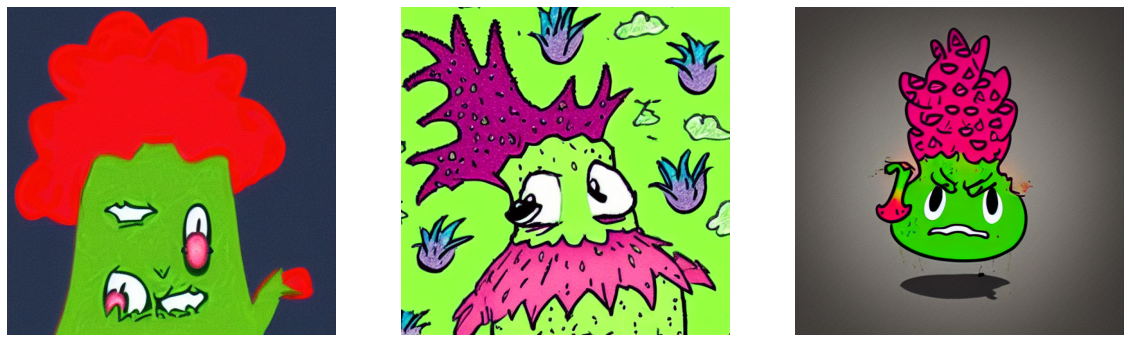

In [28]:
### generate images and plot them here
### choose number of images to be generated by changing batch_size
### change seed if you want different images with same weights
generated = stable_diffusion.text_to_image(
    prompt , batch_size=3,  num_steps=30, seed=2332
)
txt.plot_images(generated)